## Text Mining Assignment 1: Group 49 (Yven Lommen + Aioanei Bogdan)

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics 
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

categories = [
    "comp.graphics",
    "comp.os.ms-windows.misc",
    "comp.sys.ibm.pc.hardware",
    "comp.sys.mac.hardware", 
    "comp.windows.x", 
    "rec.autos",
    "rec.motorcycles", 
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.crypt",
    "sci.electronics",
    "sci.med",
    "sci.space",
    "misc.forsale",
    "talk.politics.misc",
    "talk.politics.guns",
    "talk.politics.mideast",
    "talk.religion.misc",
    "alt.atheism", 
    "soc.religion.christian"
    ]

# load the list of files matching the selected categories
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

"""
Removed:
['count', 'Decision Tree'],
['tf', 'Decision Tree'],
['idf', 'Decision Tree'],

[('vect', CountVectorizer()), ('clf', DecisionTreeClassifier())],
[('vect', CountVectorizer()),('tfidf', TfidfTransformer(use_idf=False)), ('clf', DecisionTreeClassifier())],
[('vect', CountVectorizer()),('tfidf', TfidfTransformer()), ('clf', DecisionTreeClassifier())],

"""

#description of the pipelines (features, classifiers)
Description = [ ['count', 'Naive bayes'],
                ['tf', 'Naive bayes'],
                ['idf', 'Naive bayes'],
                ['count', 'KNN'],
                ['tf', 'KNN'],
                ['idf', 'KNN'],
                ['count', 'SGDClassifier'],
                ['tf', 'SGDClassifier'],
                ['idf', 'SGDClassifier']
            ]

#Pipeline description:
#- use 4 different classifiers: Naive - Bayes, Decision Tree, KNN, Stochastic Gradient Decent
#- for each classifier, we have 3 different instances of the pipeline: 
#    - CountVectorizer + Classifier
#    - CountVectorizer + Tf + Classifier
#    - CountVectorizer + Tf-idf + Classifier


pipelines = [   [('vect', CountVectorizer()), ('clf', MultinomialNB())],
                [('vect', CountVectorizer()),('tfidf', TfidfTransformer(use_idf=False)), ('clf', MultinomialNB())], 
                [('vect', CountVectorizer()),('tfidf', TfidfTransformer()), ('clf', MultinomialNB())],
                [('vect', CountVectorizer()), ('clf', KNeighborsClassifier())],
                [('vect', CountVectorizer()),('tfidf', TfidfTransformer(use_idf=False)), ('clf', KNeighborsClassifier())],  
                [('vect', CountVectorizer()),('tfidf', TfidfTransformer()), ('clf', KNeighborsClassifier())],
                [('vect', CountVectorizer()), ('clf', SGDClassifier())],
                [('vect', CountVectorizer()),('tfidf', TfidfTransformer(use_idf=False)), ('clf', SGDClassifier())],  
                [('vect', CountVectorizer()),('tfidf', TfidfTransformer()), ('clf', SGDClassifier())] 
            ]

# Parameters for the CountVectorizer() function
parameters = { 'vect__lowercase': [True, False],
                'vect__stop_words': ['english', None],
                'vect__analyzer': ['word', 'char', 'char_wb'],
                'vect__max_features': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
                } 

In [10]:



# f = open("outcome.txt", "w")
# f.write("features, classifier, Precision, Recall, f1\n")


# for i in range(0,len(pipelines)):
#     text_clf = Pipeline(pipelines[i])
#     gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
#     gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])
#     predicted = gs_clf.predict(twenty_test.data)
#     f.write(Description[i][0] + ", " + Description[i][1] + ", ")
#     f.write(str(precision_score(twenty_test.target, predicted,average='weighted')) + ", ")
#     f.write(str(recall_score(twenty_test.target, predicted,average='weighted')) + ", ")
#     f.write(str(f1_score(twenty_test.target, predicted,average='weighted')) + "\n")
#     print(metrics.classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))
# f.close()

In [6]:
"""
removed: 'DTree-Count','DTree-Tf','DTree-Tfidf',
"""

classifiers = ['Naive-Bayes-Count','Naive-Bayes-Tf','Naive-Bayes-Tfidf',
               
               'KNN-Count','KNN-Tf','KNN-Tfidf',
               'SGD-Count','SGD-Tf','SGD-Tfidf']

resulting_data = {}

f = open("outcome.txt", "w")
f.write("features, classifier, Precision, Recall, f1\n")

for i in range(0, len(pipelines)):
    text_clf = Pipeline(pipelines[i])
    gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
    gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)
    predicted = gs_clf.predict(twenty_test.data)
    report = classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names, output_dict=True)
    df = pd.DataFrame(report).transpose()
    resulting_data[classifiers[i]] = df
    print('Done: ' + classifiers[i] + '\n')
    f.write(Description[i][0] + ", " + Description[i][1] + ", ")
    f.write(str(precision_score(twenty_test.target, predicted,average='weighted')) + ", ")
    f.write(str(recall_score(twenty_test.target, predicted,average='weighted')) + ", ")
    f.write(str(f1_score(twenty_test.target, predicted,average='weighted')) + "\n")
    print(str(i)+ ": done")
f.close()


Done: Naive-Bayes-Count

0: done
Done: Naive-Bayes-Tf

1: done
Done: Naive-Bayes-Tfidf

2: done
Done: KNN-Count

3: done
Done: KNN-Tf

4: done
Done: KNN-Tfidf

5: done
Done: SGD-Count

6: done
Done: SGD-Tf

7: done
Done: SGD-Tfidf

8: done


### Comparison between types of preprocessing Count / Tf / Tf-idf

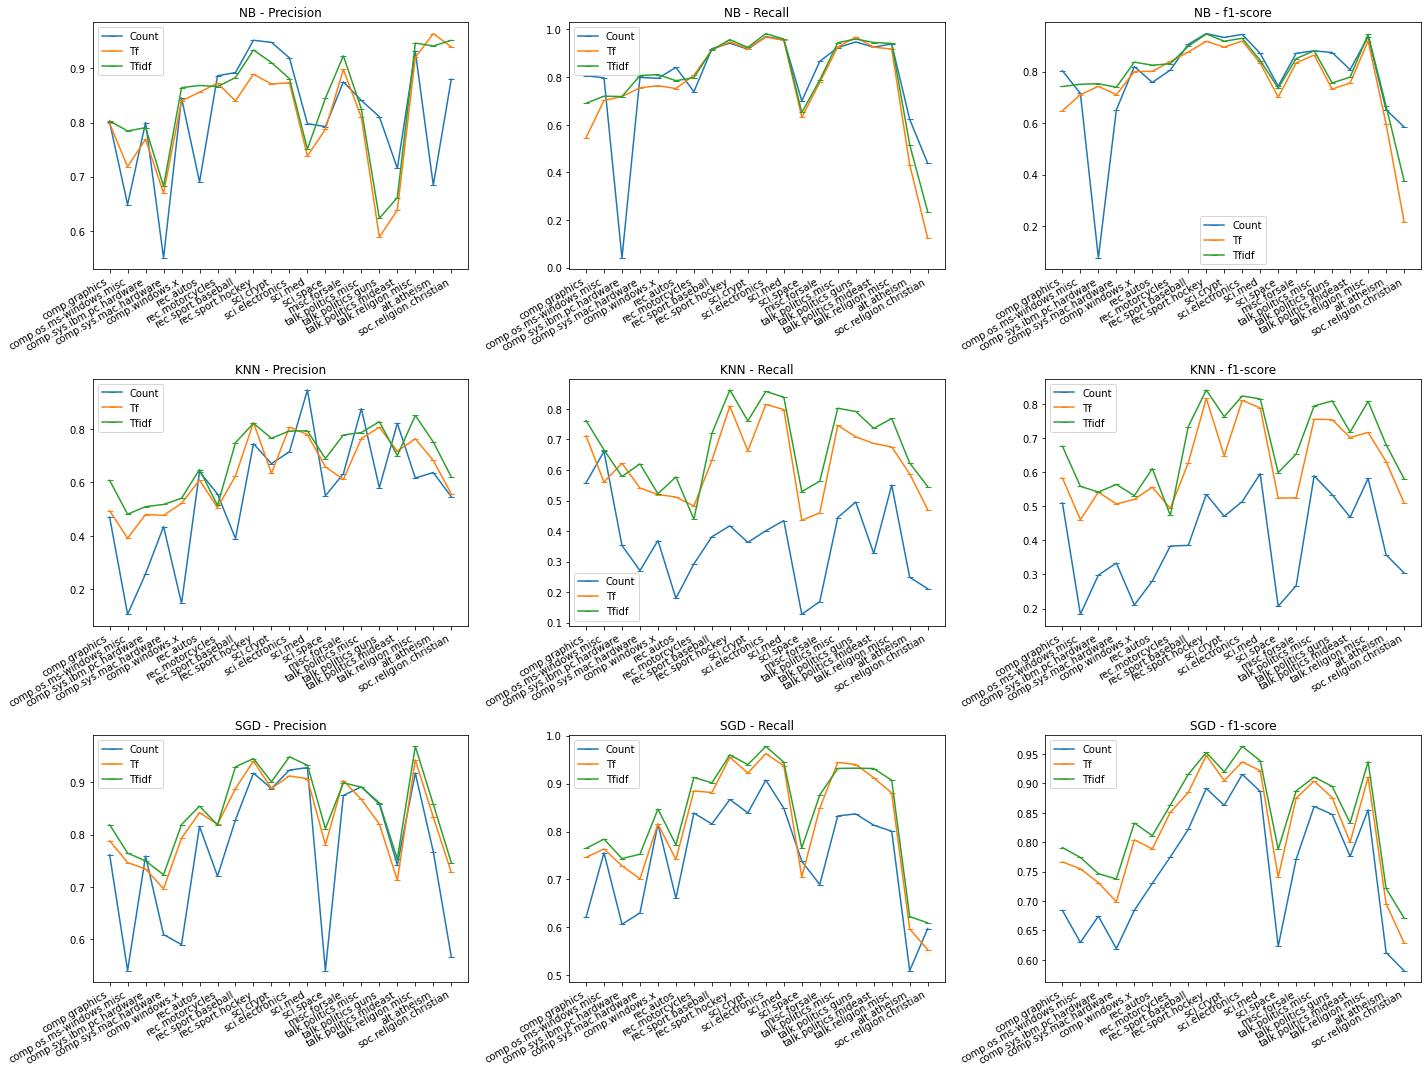

In [7]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(3 , 3, figsize=(20,15))


for key in resulting_data.keys():
    df = resulting_data[key]
    
    precision_data = df.precision[:-3].to_list()
    recall_data = df.recall[:-3].to_list()
    f1score_data = df['f1-score'][:-3].to_list()
    
    if 'Naive-Bayes' in key:
        axis[0][0].plot(range(len(precision_data)), precision_data, label = key[12:], marker = '_')
        axis[0][0].set_title("NB - Precision")
        axis[0][1].plot(range(len(precision_data)), recall_data, label = key[12:], marker = '_')
        axis[0][1].set_title("NB - Recall")
        axis[0][2].plot(range(len(precision_data)), f1score_data, label = key[12:], marker = '_')
        axis[0][2].set_title("NB - f1-score")
               
        axis[0][0].set_xticklabels(range(len(precision_data)))
        axis[0][1].set_xticklabels(range(len(precision_data)))
        axis[0][2].set_xticklabels(range(len(precision_data)))
        
        legend0 = axis[0][0].legend()
        legend1 = axis[0][1].legend()
        legend2 = axis[0][2].legend()
        
    elif 'KNN' in key:
        axis[1][0].plot(range(len(precision_data)), precision_data, label = key[4:], marker = '_')
        axis[1][0].set_title("KNN - Precision")
        axis[1][1].plot(range(len(precision_data)), recall_data, label = key[4:], marker = '_')
        axis[1][1].set_title("KNN - Recall")
        axis[1][2].plot(range(len(precision_data)), f1score_data, label = key[4:], marker = '_')
        axis[1][2].set_title("KNN - f1-score")
        
        axis[1][0].set_xticklabels(range(len(precision_data)))
        axis[1][1].set_xticklabels(range(len(precision_data)))
        axis[1][2].set_xticklabels(range(len(precision_data)))
        
        legend0 = axis[1][0].legend()
        legend1 = axis[1][1].legend()
        legend2 = axis[1][2].legend()
        
    elif 'SGD' in key:
        axis[2][0].plot(range(len(precision_data)), precision_data, label = key[4:], marker = '_')
        axis[2][0].set_title("SGD - Precision")
        axis[2][1].plot(range(len(precision_data)), recall_data, label = key[4:], marker = '_')
        axis[2][1].set_title("SGD - Recall")
        axis[2][2].plot(range(len(precision_data)), f1score_data, label = key[4:], marker = '_')
        axis[2][2].set_title("SGD - f1-score")
                
        axis[2][0].set_xticklabels(range(len(precision_data)))
        axis[2][1].set_xticklabels(range(len(precision_data)))
        axis[2][2].set_xticklabels(range(len(precision_data)))
        
        legend0 = axis[2][0].legend()
        legend1 = axis[2][1].legend()
        legend2 = axis[2][2].legend()
        
figure.tight_layout()
        
        


Each marker on the graph represents a category represented in this order:
- "comp.graphics",
- "comp.os.ms-windows.misc",
- "comp.sys.ibm.pc.hardware",
- "comp.sys.mac.hardware", 
- "comp.windows.x", 
- "rec.autos",
- "rec.motorcycles", 
- "rec.sport.baseball",
- "rec.sport.hockey",
- "sci.crypt",
- "sci.electronics",
- "sci.med",
- "sci.space",
- "misc.forsale",
- "talk.politics.misc",
- "talk.politics.guns",
- "talk.politics.mideast",
- "talk.religion.misc",
- "alt.atheism", 
- "soc.religion.christian"

### Comparison between Classifiers NB / Decision Tree / KNN / SGD

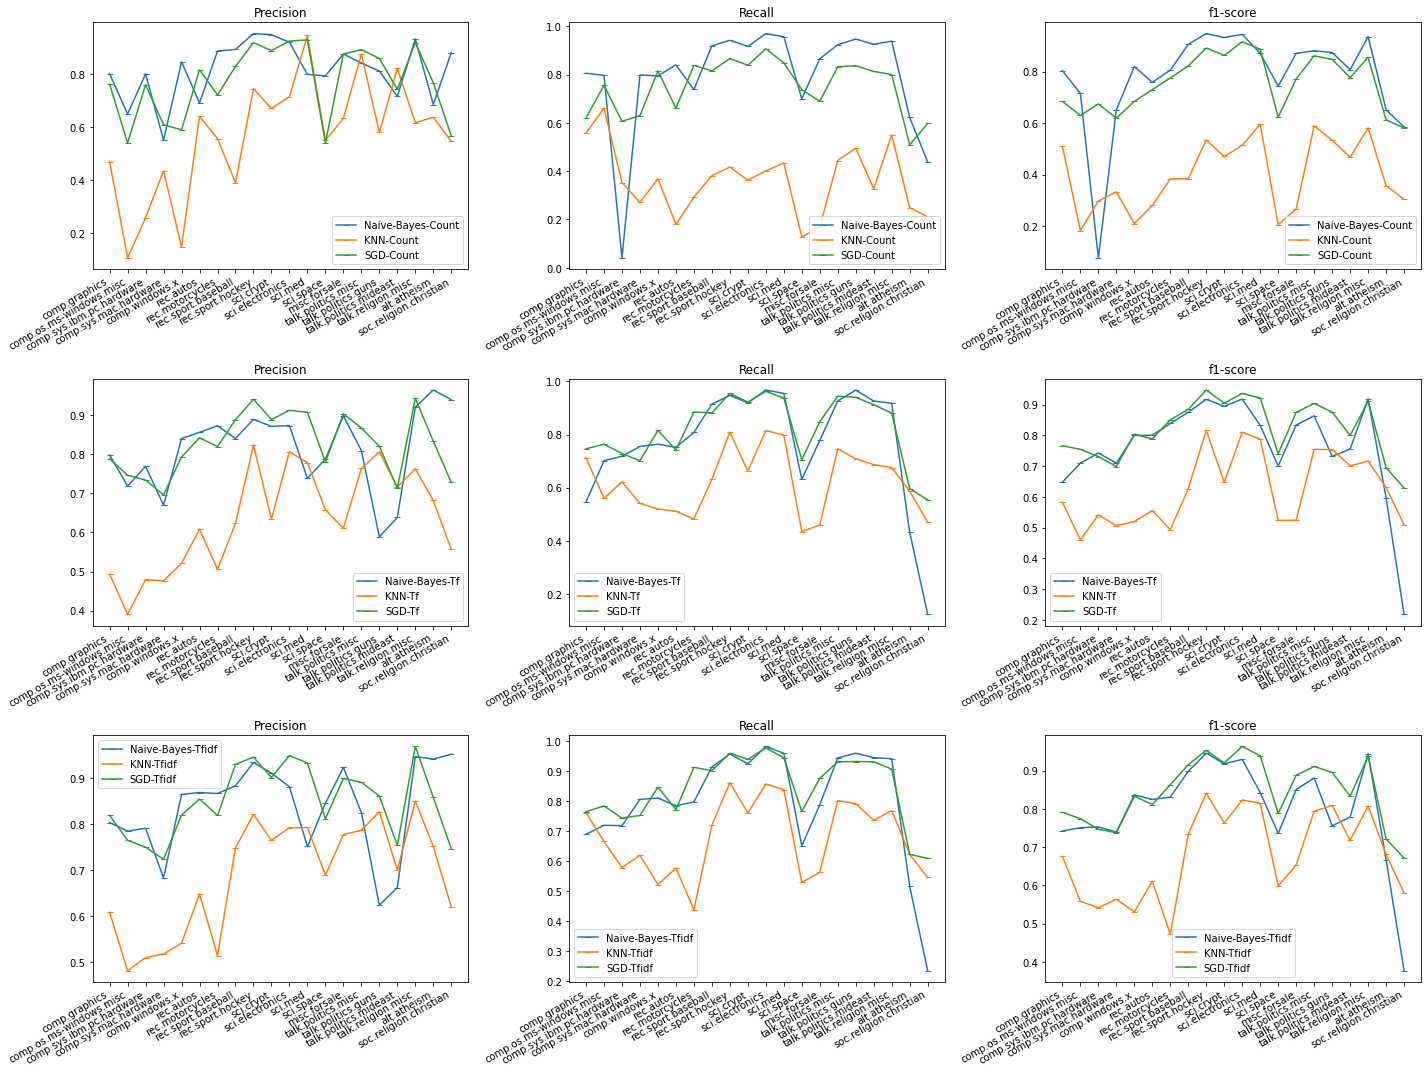

In [8]:
figure, axis = plt.subplots(3 , 3, figsize=(20,15))

for key in resulting_data.keys():
    df = resulting_data[key]
    
    precision_data = df.precision[:-3].to_list()
    recall_data = df.recall[:-3].to_list()
    f1score_data = df['f1-score'][:-3].to_list()
    
    if '-Count' in key:
        axis[0][0].plot(categories, precision_data, label = key, marker = '_')
        axis[0][0].set_title("Precision")
        axis[0][1].plot(categories, recall_data, label = key, marker = '_')
        axis[0][1].set_title("Recall")
        axis[0][2].plot(categories, f1score_data, label = key, marker = '_')
        axis[0][2].set_title("f1-score")
        
        plt.setp(axis[0][0].get_xticklabels(), rotation=30, horizontalalignment='right')
        plt.setp(axis[0][1].get_xticklabels(), rotation=30, horizontalalignment='right')
        plt.setp(axis[0][2].get_xticklabels(), rotation=30, horizontalalignment='right')
        
        legend0 = axis[0][0].legend()
        legend1 = axis[0][1].legend()
        legend2 = axis[0][2].legend()
        
    elif '-Tf' in key[-3:]:
        axis[1][0].plot(categories, precision_data, label = key, marker = '_')
        axis[1][0].set_title("Precision")
        axis[1][1].plot(categories, recall_data, label = key, marker = '_')
        axis[1][1].set_title("Recall")
        axis[1][2].plot(categories, f1score_data, label = key, marker = '_')
        axis[1][2].set_title("f1-score")
        
        plt.setp(axis[1][0].get_xticklabels(), rotation=30, horizontalalignment='right')
        plt.setp(axis[1][1].get_xticklabels(), rotation=30, horizontalalignment='right')
        plt.setp(axis[1][2].get_xticklabels(), rotation=30, horizontalalignment='right')
        
        legend0 = axis[1][0].legend()
        legend1 = axis[1][1].legend()
        legend2 = axis[1][2].legend()
        
        
    elif '-Tfidf' in key:
        axis[2][0].plot(categories, precision_data, label = key, marker = '_')
        axis[2][0].set_title("Precision")
        axis[2][1].plot(categories, recall_data, label = key, marker = '_')
        axis[2][1].set_title("Recall")
        axis[2][2].plot(categories, f1score_data, label = key, marker = '_')
        axis[2][2].set_title("f1-score")
        
        plt.setp(axis[2][0].get_xticklabels(), rotation=30, horizontalalignment='right')
        plt.setp(axis[2][1].get_xticklabels(), rotation=30, horizontalalignment='right')
        plt.setp(axis[2][2].get_xticklabels(), rotation=30, horizontalalignment='right')
        
        legend0 = axis[2][0].legend()
        legend1 = axis[2][1].legend()
        legend2 = axis[2][2].legend()
        
        
figure.tight_layout()
    
        
        
        
    